In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv', nrows=30000)

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


FutureWarning uyarısı almamak için eklendi

In [57]:
df.shape


(30000, 12)

In [58]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     29994 non-null  float64
 1   status          30000 non-null  object 
 2   price           30000 non-null  float64
 3   bed             22734 non-null  float64
 4   bath            22790 non-null  float64
 5   acre_lot        25297 non-null  float64
 6   street          29933 non-null  float64
 7   city            29984 non-null  object 
 8   state           30000 non-null  object 
 9   zip_code        29972 non-null  float64
 10  house_size      22901 non-null  float64
 11  prev_sold_date  10051 non-null  object 
dtypes: float64(8), object(4)
memory usage: 2.7+ MB


In [60]:
df.isnull().sum()

brokered_by           6
status                0
price                 0
bed                7266
bath               7210
acre_lot           4703
street               67
city                 16
state                 0
zip_code             28
house_size         7099
prev_sold_date    19949
dtype: int64

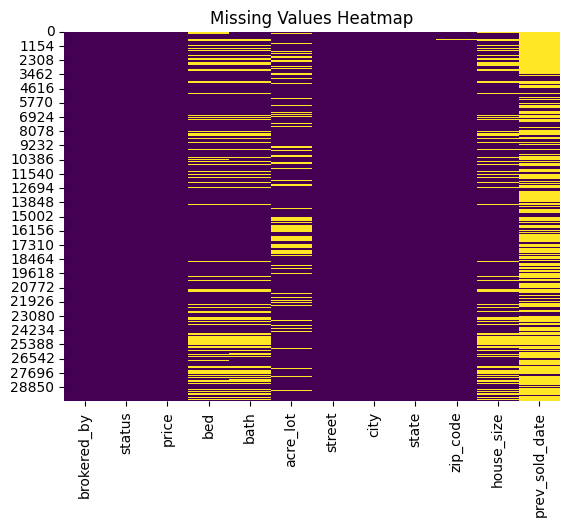

In [61]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Eksik verileri görselleştirdim

In [62]:
df['street'] = df['street'].fillna(df['street'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].mean())
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())
df.dropna(subset=['price'], inplace=True)


Eksik verileri doldurdum

In [63]:
df.isnull().sum()

brokered_by           6
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    19949
dtype: int64

In [64]:
df['brokered_by'].fillna(df['brokered_by'].mode()[0], inplace=True)

Mod ile doldurdum

In [65]:
df.isnull().sum()

brokered_by           0
status                0
price                 0
bed                   0
bath                  0
acre_lot              0
street                0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    19949
dtype: int64

In [66]:
X = df[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

İlk model olarak K-means seçtim bunun daha iyi çalışması için normalizasyon yaptım.

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)  # İstediğiniz küme sayısını ayarlayın
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [69]:
df['Cluster'] = kmeans.labels_


n_clusters ile kaç tane küme oluşturacağımı belirledim

In [70]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)


Küme merkezlerini ters normalleştirerek, görselleştirme için hazır hale getirdim

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     30000 non-null  float64
 1   status          30000 non-null  object 
 2   price           30000 non-null  float64
 3   bed             30000 non-null  float64
 4   bath            30000 non-null  float64
 5   acre_lot        30000 non-null  float64
 6   street          30000 non-null  float64
 7   city            30000 non-null  object 
 8   state           30000 non-null  object 
 9   zip_code        30000 non-null  float64
 10  house_size      30000 non-null  float64
 11  prev_sold_date  10051 non-null  object 
 12  Cluster         30000 non-null  int32  
dtypes: float64(8), int32(1), object(4)
memory usage: 2.9+ MB


In [72]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,Cluster
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,30000.000000
mean,51475.965000,6.719845e+05,3.369967,2.433567,21.701865,1.066562e+06,3411.124467,2.272990e+03,0.000233
std,31896.644349,1.343804e+06,1.878228,1.866486,1012.823605,6.065204e+05,2479.403399,8.562316e+03,0.020816
min,56.000000,1.000000e+00,1.000000,1.000000,0.000000,4.000000e+00,601.000000,1.000000e+02,0.000000
25%,22611.000000,1.900000e+05,3.000000,2.000000,0.250000,5.537382e+05,1913.000000,1.372000e+03,0.000000
50%,52607.000000,3.749000e+05,3.000000,2.000000,0.970000,1.090008e+06,2871.000000,2.214000e+03,0.000000
75%,79077.000000,6.750000e+05,4.000000,3.000000,8.585000,1.619642e+06,4401.000000,2.285000e+03,0.000000
max,110138.000000,6.000000e+07,99.000000,198.000000,100000.000000,2.001321e+06,99999.000000,1.450112e+06,2.000000


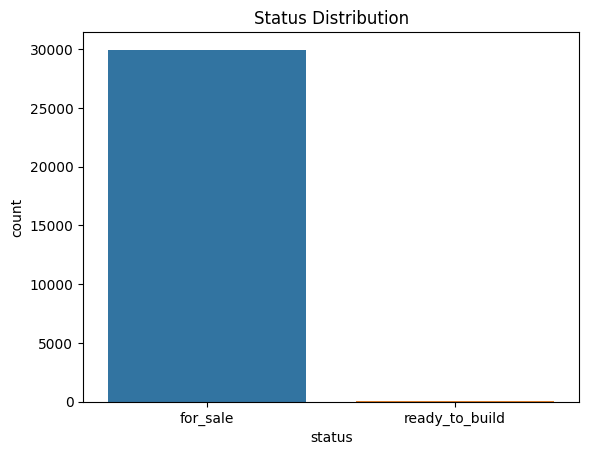

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='status')
plt.title('Status Distribution')
plt.show()


Status sütunun dağılımını görselleştirdim

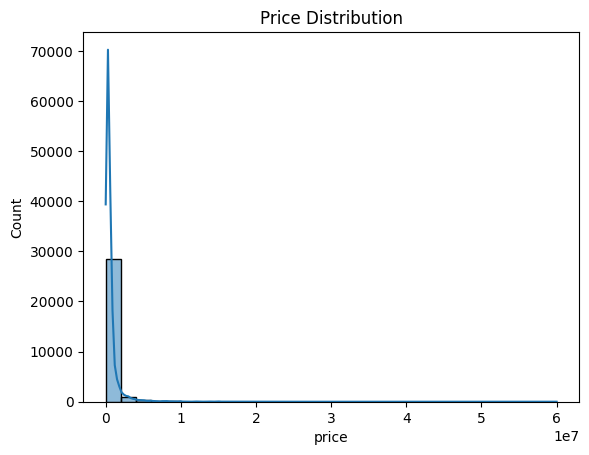

In [74]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()


Price sütunun dağılımını görselleştirdim

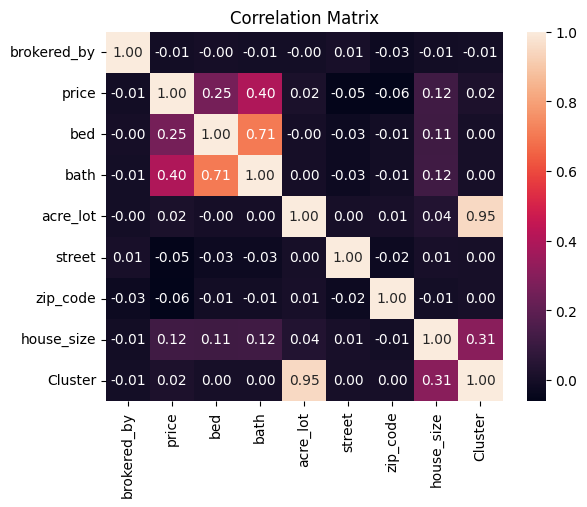

In [75]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Sayısal sütunları seçerek korelasyon matrisini oluşturdum ve görselleştirdim

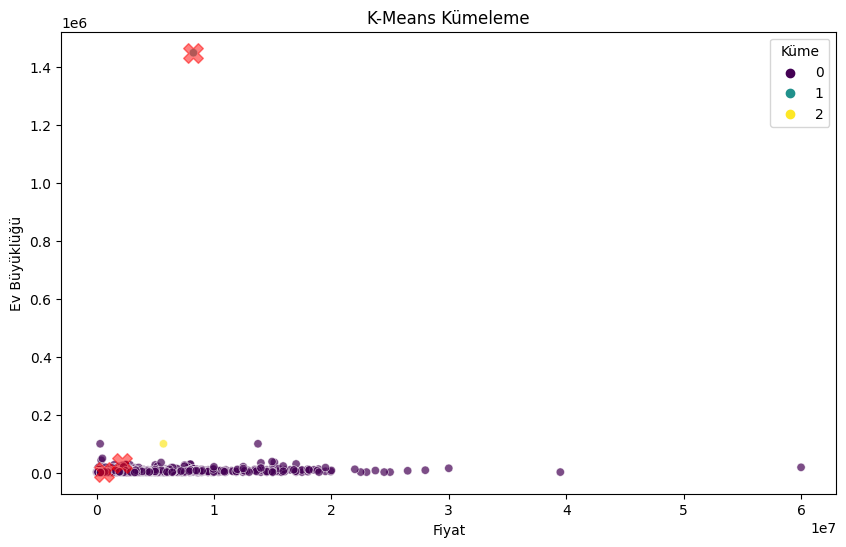

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['house_size'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 4], c='red', s=200, alpha=0.5, marker='X')  # Küme merkezleri
plt.title('K-Means Kümeleme')
plt.xlabel('Fiyat')
plt.ylabel('Ev Büyüklüğü')
plt.legend(title='Küme')
plt.show()

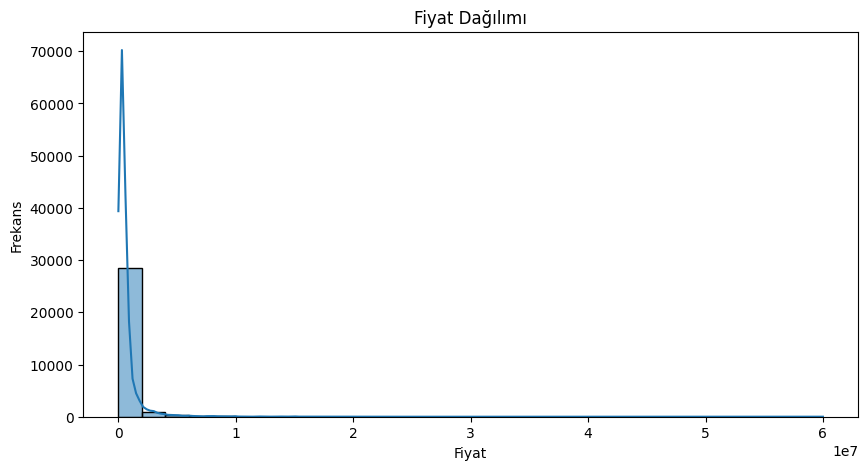

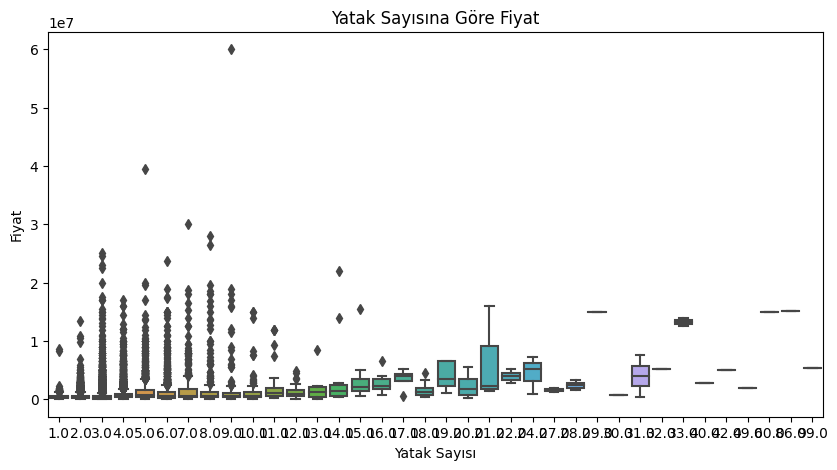

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='bed', y='price', data=df)
plt.title('Yatak Sayısına Göre Fiyat')
plt.xlabel('Yatak Sayısı')
plt.ylabel('Fiyat')
plt.show()


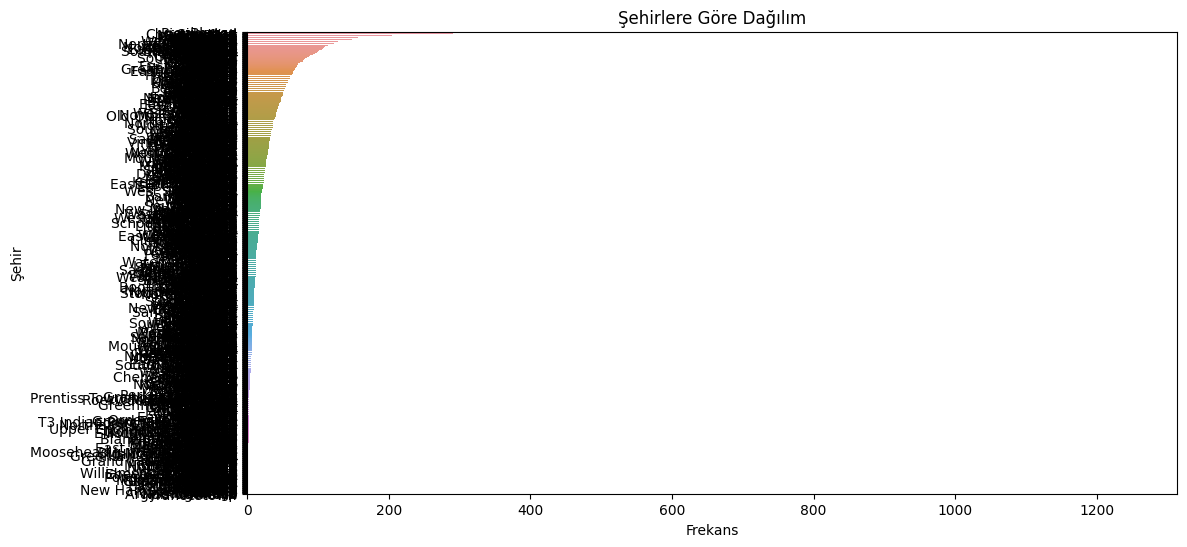

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(y='city', data=df, order=df['city'].value_counts().index)
plt.title('Şehirlere Göre Dağılım')
plt.xlabel('Frekans')
plt.ylabel('Şehir')
plt.show()


In [79]:
df.shape


(30000, 13)

In [80]:
street_columns = [col for col in df.columns if col.startswith('street_')]

existing_columns = []
if 'city' in df.columns:
    existing_columns.append('city')
if 'state' in df.columns:
    existing_columns.append('state')

df = pd.get_dummies(df, columns=street_columns + existing_columns, drop_first=True)


Bazı sütunlarda one-hot encoding yaparak sayısal değerlere dönüştürdüm. Tüm verileri kullanabilmesi için.

In [81]:
df.isnull().sum()


brokered_by             0
status                  0
price                   0
bed                     0
bath                    0
                       ..
state_Tennessee         0
state_Vermont           0
state_Virgin Islands    0
state_Virginia          0
state_Wyoming           0
Length: 1183, dtype: int64

In [82]:
df.shape

(30000, 1183)

In [83]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,zip_code,house_size,prev_sold_date,...,state_New Jersey,state_New York,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_Tennessee,state_Vermont,state_Virgin Islands,state_Virginia,state_Wyoming
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,601.0,920.000000,NaN,...,False,False,True,False,False,False,False,False,False,False
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,601.0,1527.000000,NaN,...,False,False,True,False,False,False,False,False,False,False
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,795.0,748.000000,NaN,...,False,False,True,False,False,False,False,False,False,False
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,731.0,1800.000000,NaN,...,False,False,True,False,False,False,False,False,False,False
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,680.0,2272.989826,NaN,...,False,False,True,False,False,False,False,False,False,False


price         float64
bed           float64
bath          float64
acre_lot      float64
house_size    float64
dtype: object
price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64


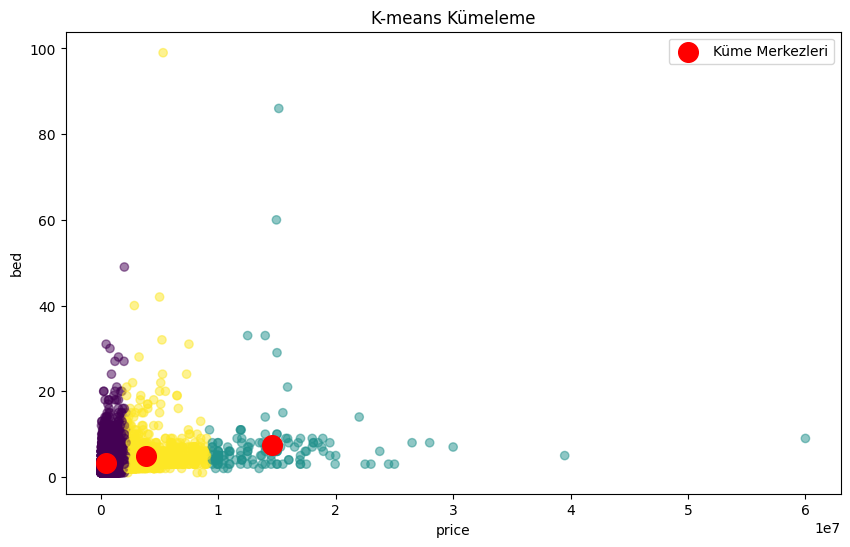

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(X.dtypes)

print(X.isnull().sum())

X.fillna(X.mean(), inplace=True)

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)  

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Küme Merkezleri')
plt.title('K-means Kümeleme')
plt.xlabel(X.columns[0]) 
plt.ylabel(X.columns[1])  
plt.legend()
plt.show()


Eksik verileri doldurdum. K-means için küme sayısı belirledim.ve bunları görselleştirdim.

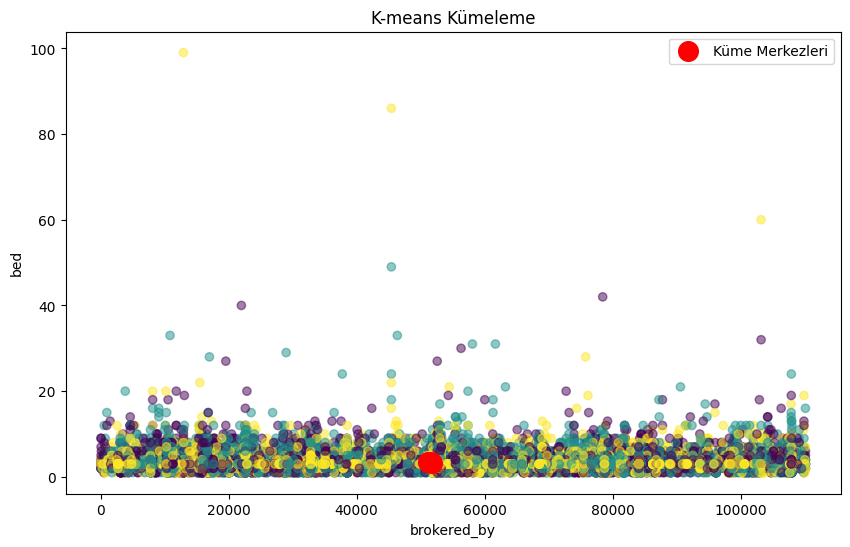

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

if 'price' in df.columns:
    X = df.drop('price', axis=1)  
else:
    print("'price' sütunu mevcut değil, tüm sütunları kullanıyoruz.")
    X = df  

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X) 

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Küme Merkezleri')
plt.title('K-means Kümeleme')
plt.xlabel(X.columns[0]) 
plt.ylabel(X.columns[1]) 
plt.legend()
plt.show()


Bazı sütunlar hala sayısal verilere dönüşmemiş bunu burada düzeltiyorum. Bağımsız değişkenler ile modeli eğitiyorum.ve küme merkezleri görselleştirdim

In [86]:
print(df.columns)


Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size', 'Cluster', 'city_Abington',
       ...
       'prev_sold_date_2022-05-13', 'prev_sold_date_2022-05-20',
       'prev_sold_date_2022-05-23', 'prev_sold_date_2022-05-27',
       'prev_sold_date_2022-05-30', 'prev_sold_date_2022-05-31',
       'prev_sold_date_2022-06-01', 'prev_sold_date_2022-09-30',
       'prev_sold_date_2022-12-01', 'cluster'],
      dtype='object', length=6521)


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['price', 'bed', 'bath', 'acre_lot', 'house_size']] = scaler.fit_transform(df[['price', 'bed', 'bath', 'acre_lot', 'house_size']])


min-max normalizasyonu yaptım

In [88]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim kümesi boyutu: {X_train.shape[0]}")
print(f"Test kümesi boyutu: {X_test.shape[0]}")


Eğitim kümesi boyutu: 24000
Test kümesi boyutu: 6000


Eğitim ve test kümelerini ayırdım. sonuçları çıkarttım

Sillhouette skorum negatif çıktı K-means ile yapınca bu yüzden modelimi değiştiriyorum. Sillhouette skorum :-0.040489084406031925 

DBSCAN Silhouette Skoru: 0.9772300024187471


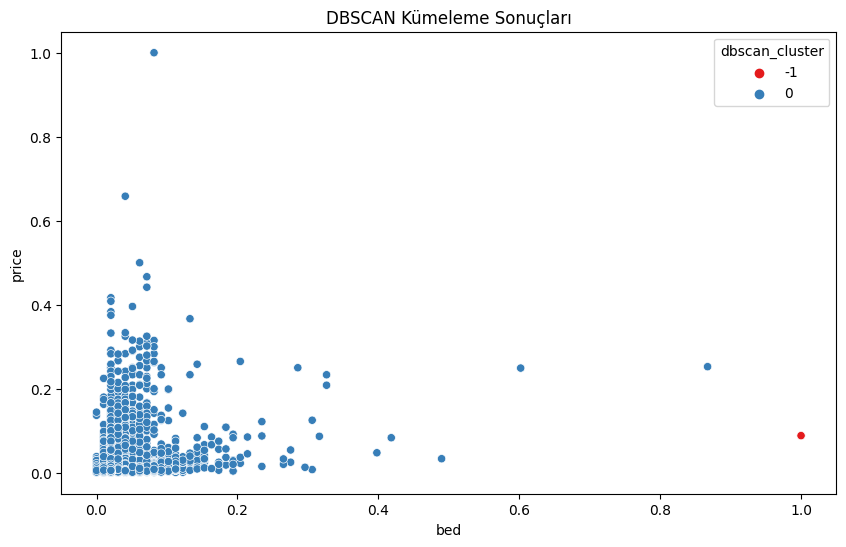

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(df[['price', 'bed', 'bath', 'acre_lot', 'house_size']])

df['dbscan_cluster'] = dbscan_labels

silhouette_avg = silhouette_score(df[['price', 'bed', 'bath', 'acre_lot', 'house_size']], dbscan_labels)
print(f"DBSCAN Silhouette Skoru: {silhouette_avg}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bed', y='price', hue='dbscan_cluster', palette='Set1')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.show()


K-means ile denedim Silhouette Skoru negatif çıkınca DBSCAN ile denedim ve oldukça iyi bir sonuç elde ettim. Ve bunu görselleştirdim

In [90]:
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)


cluster
2    10782
1     9830
0     9388
Name: count, dtype: int64


Küme büyüklüklerini çıkarttım

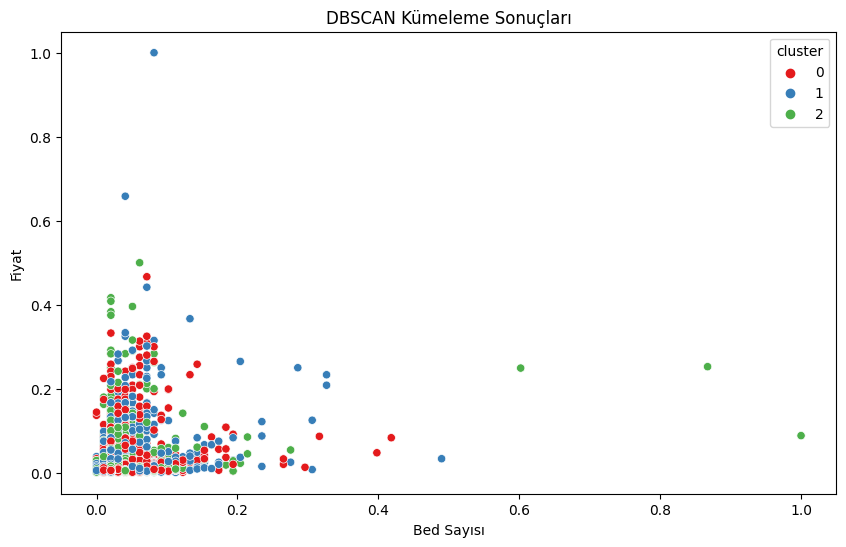

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bed', y='price', hue='cluster', palette='Set1')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel('Bed Sayısı')
plt.ylabel('Fiyat')
plt.show()


In [92]:
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

          brokered_by     price       bed      bath  acre_lot        street  \
cluster                                                                       
0        51562.664678  0.012169  0.024513  0.007436  0.000202  3.293975e+05   
1        51121.890132  0.012138  0.024729  0.007485  0.000191  1.041252e+06   
2        51723.286403  0.009501  0.023399  0.006949  0.000253  1.731494e+06   

            zip_code  house_size   Cluster  city_Abington  ...  \
cluster                                                    ...   
0        3425.865254    0.001473  0.000213       0.000426  ...   
1        3523.175381    0.001479  0.000203       0.000712  ...   
2        3296.132165    0.001539  0.000278       0.000464  ...   

         prev_sold_date_2022-05-13  prev_sold_date_2022-05-20  \
cluster                                                         
0                         0.000000                   0.000000   
1                         0.000000                   0.000000   
2            

Kümelere göre ortalamaları hesapladım

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true_regression = np.array([3, -0.5, 2, 7])  
y_pred_regression = np.array([2.5, 0.0, 2, 8])  

mse = mean_squared_error(y_true_regression, y_pred_regression)
print(f'Ortalama Karesel Hata (MSE): {mse}')

mae = mean_absolute_error(y_true_regression, y_pred_regression)
print(f'Ortalama Mutlak Hata (MAE): {mae}')


Ortalama Karesel Hata (MSE): 0.375
Ortalama Mutlak Hata (MAE): 0.5


Hata oranlarını gösterdim

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_true_classification = np.array([1, 0, 1, 1, 0, 1, 0])  
y_pred_classification = np.array([1, 0, 1, 0, 0, 1, 1]) 

cm = confusion_matrix(y_true_classification, y_pred_classification)
print(f'Karışıklık Matrisi:\n{cm}')

accuracy = accuracy_score(y_true_classification, y_pred_classification)
print(f'Doğruluk (Accuracy): {accuracy}')

precision = precision_score(y_true_classification, y_pred_classification)
print(f'Kesinlik (Precision): {precision}')

recall = recall_score(y_true_classification, y_pred_classification)
print(f'Duyarlılık (Recall): {recall}')

f1 = f1_score(y_true_classification, y_pred_classification)
print(f'F1 Puanı (F1 Score): {f1}')


Karışıklık Matrisi:
[[2 1]
 [1 3]]
Doğruluk (Accuracy): 0.7142857142857143
Kesinlik (Precision): 0.75
Duyarlılık (Recall): 0.75
F1 Puanı (F1 Score): 0.75
